# DA for AQMS in QLD
### The current version is to wrangle and clean the AQ data from the AQMS in QLD, or AMNS in QLD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from data_fetcher import qld_amns_data_fetcher as qadf

In [2]:
years = [2019,2020,2021,2022,2023]
amns = ["Boat Creek", "Memorial Park", "South Gladstone"]

In [3]:
bc_data = qadf(years=years, location="Boat Creek")
mp_data = qadf(years=years, location="Memorial Park")
sg_data = qadf(years=years, location="South Gladstone")
df_bc = bc_data.fetch().format()
df_mp = mp_data.fetch().format()
df_sg = sg_data.fetch().format()

In [4]:
df_bc.head()

,Date,Time,Wind Direction (degTN),Wind Speed (m/s),Wind Sigma Theta (deg),Wind Speed Std Dev (m/s),Air Temperature (degC),Relative Humidity (%),Nitrogen Oxide (ppm),Nitrogen Dioxide (ppm),Nitrogen Oxides (ppm),Sulfur Dioxide (ppm),PM10 (ug/m^3),PM2.5 (ug/m^3),Visibility-reducing Particles (Mm^-1),Nitric Oxide (ppm),Barometric Pressure (hPa),Datetime
0,01/01/2019,00:00,159.0,1.3,18.0,0.5,23.4,82.8,NaN,NaN,NaN,NaN,19.1,6.0,NaN,NaN,NaN,2019-01-01 00:00:00
1,01/01/2019,01:00,131.0,1.4,26.0,0.6,23.4,84.4,0.0,0.004,0.004,0.000,16.4,3.2,14.0,NaN,NaN,2019-01-01 01:00:00
2,01/01/2019,02:00,112.0,2.2,21.6,0.9,23.9,80.1,0.0,0.003,0.003,0.001,16.8,2.8,17.0,NaN,NaN,2019-01-01 02:00:00
3,01/01/2019,03:00,151.0,1.4,19.7,0.5,23.3,83.7,0.0,0.004,0.004,0.001,17.4,2.1,20.0,NaN,NaN,2019-01-01 03:00:00
4,01/01/2019,04:00,159.0,1.2,16.6,0.5,22.7,84.5,0.0,0.005,0.005,0.001,17.6,2.4,20.0,NaN,NaN,2019-01-01 04:00:00


In [5]:
def qld_amns_wrangler(df):
    # drop any NA for the columns that we care about
    df.dropna(subset=df.select_dtypes(include=['float']).columns)
    
    # wrangle the data
    df['year'] = df.Datetime.dt.year
    df['month'] = df.Datetime.dt.month
    df['day'] = df.Datetime.dt.day
    df['hour'] = df.Datetime.dt.hour
    # df = df.sort_values(by=['Datetime'])
    df = df.set_index('Datetime')
    df.sort_index(inplace=True)
    # need to covert the unit for NO2 from ppm to ug/m3
    try:
        df['Nitrogen Dioxide (ppm)'] = df['Nitrogen Dioxide (ppm)']*1880
        df.rename(columns={'Nitrogen Dioxide (ppm)':'Nitrogen Dioxide (ug/m^3)'}, inplace=True) 
        print('NO2 unit has been changed from ppm to µg/m³')
    except:
        pass
    return df

In [6]:
# select items
items = ['Nitrogen Dioxide (ppm)', 'PM10 (ug/m^3)', 'PM2.5 (ug/m^3)','Sulfur Dioxide (ppm)']
# load the data
df_bc = qld_amns_wrangler(df_bc)
df_mp = qld_amns_wrangler(df_mp)
df_sg = qld_amns_wrangler(df_sg)

NO2 unit has been changed from ppm to µg/m³
NO2 unit has been changed from ppm to µg/m³
NO2 unit has been changed from ppm to µg/m³


In [8]:
df_bccl.head()

,Date,Time,Wind Direction (degTN),Wind Speed (m/s),Wind Sigma Theta (deg),Wind Speed Std Dev (m/s),Air Temperature (degC),Relative Humidity (%),Nitrogen Oxide (ppm),Nitrogen Dioxide (ug/m^3),...,Sulfur Dioxide (ppm),PM10 (ug/m^3),PM2.5 (ug/m^3),Visibility-reducing Particles (Mm^-1),Nitric Oxide (ppm),Barometric Pressure (hPa),year,month,day,hour
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,01/01/2019,00:00,159.0,1.3,18.0,0.5,23.4,82.8,NaN,NaN,...,NaN,19.1,6.0,NaN,NaN,NaN,2019,1,1,0
2019-01-01 01:00:00,01/01/2019,01:00,131.0,1.4,26.0,0.6,23.4,84.4,0.0,7.52,...,0.000,16.4,3.2,14.0,NaN,NaN,2019,1,1,1
2019-01-01 02:00:00,01/01/2019,02:00,112.0,2.2,21.6,0.9,23.9,80.1,0.0,5.64,...,0.001,16.8,2.8,17.0,NaN,NaN,2019,1,1,2
2019-01-01 03:00:00,01/01/2019,03:00,151.0,1.4,19.7,0.5,23.3,83.7,0.0,7.52,...,0.001,17.4,2.1,20.0,NaN,NaN,2019,1,1,3
2019-01-01 04:00:00,01/01/2019,04:00,159.0,1.2,16.6,0.5,22.7,84.5,0.0,9.40,...,0.001,17.6,2.4,20.0,NaN,NaN,2019,1,1,4


In [8]:
df_mp.head()

,Date,Time,Ozone (ppm),Nitrogen Dioxide (ppm),Sulfur Dioxide (ppm),Benzene (ppb),Toluene (ppb),Xylenes (total) (ppb),Formaldehyde (ppb),Datetime
1523,05/03/2019,11:00,0.017,0.004,0.004,1.3,1.9,5.4,2.2,2019-03-05 11:00:00
1524,05/03/2019,12:00,0.018,0.002,0.003,1.5,2.2,4.2,3.0,2019-03-05 12:00:00
1525,05/03/2019,13:00,0.017,0.002,0.005,2.3,2.7,6.1,2.1,2019-03-05 13:00:00
1526,05/03/2019,14:00,0.016,0.002,0.007,1.6,2.3,3.9,2.4,2019-03-05 14:00:00
1527,05/03/2019,15:00,0.013,0.003,0.004,1.6,3.0,2.6,1.7,2019-03-05 15:00:00


### try some plots

> # NOx hourly

In [10]:
FontSize = 18
TickSize = 18

In [12]:
df_sg['Time']

1       2024-11-05 01:00:00
2       2024-11-05 02:00:00
3       2024-11-05 03:00:00
4       2024-11-05 04:00:00
5       2024-11-05 05:00:00
                ...        
43819   2024-11-05 19:00:00
43820   2024-11-05 20:00:00
43821   2024-11-05 21:00:00
43822   2024-11-05 22:00:00
43823   2024-11-05 23:00:00
Name: Time, Length: 38660, dtype: datetime64[ns]

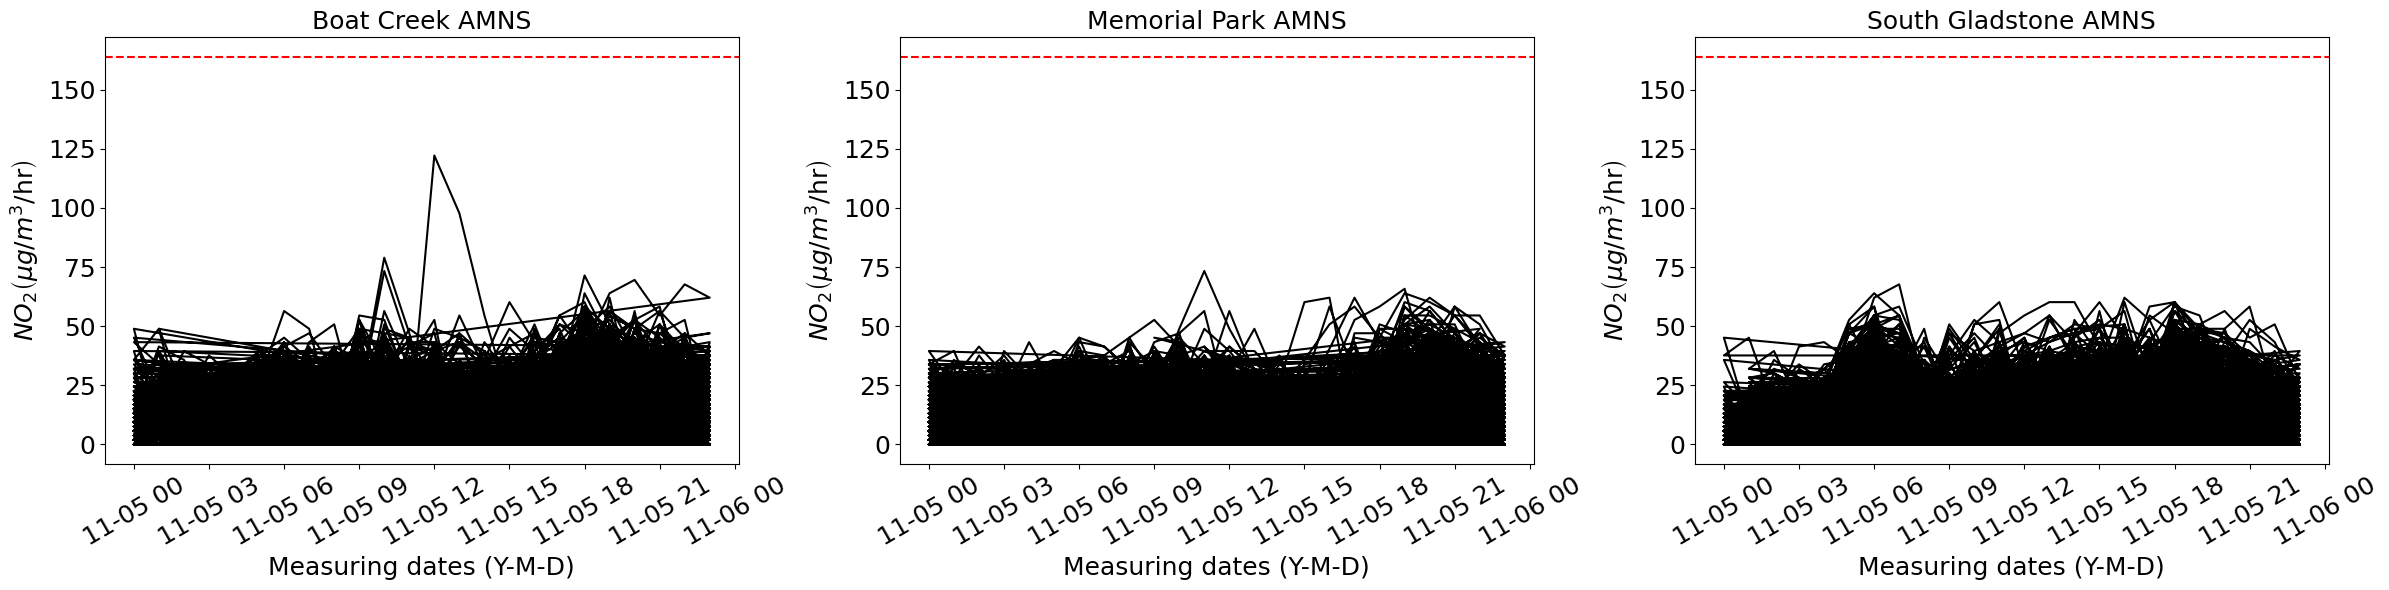

In [11]:
criterion = 164
# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# Boat Creek
y = df_bc['Nitrogen Dioxide (ug/m^3)']
x = df_bc['Time']
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$NO_2 \left(\mu g/m^3/\text{hr}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)

# Memorial Park
y = df_mp['Nitrogen Dioxide (ug/m^3)']
x = df_mp['Time']
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$NO_2 \left(\mu g/m^3/\text{hr}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('Memorial Park AMNS', fontsize=TickSize)

# South Gladstone
y = df_sg['Nitrogen Dioxide (ug/m^3)']
x = df_sg['Time']
ax3.plot(x,y,'k-')
ax3.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax3.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax3.set_ylabel(r'$NO_2 \left(\mu g/m^3/\text{hr}\right)$', fontsize=FontSize)
ax3.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax3.tick_params(axis='y', labelsize=TickSize)
ax3.set_title('South Gladstone AMNS', fontsize=TickSize)

# plot
plt.tight_layout()
plt.show()

In [25]:
df_bc[df_bc.Parameter == 'Nitrogen dioxide'].Measurement.max()

np.float64(33.839999999999996)

In [26]:
df_mp[df_mp.Parameter == 'Nitrogen dioxide'].Measurement.max()

np.float64(63.92)

In [27]:
df_sg[df_sg.Parameter == 'Nitrogen dioxide'].Measurement.max()

np.float64(33.839999999999996)

> # get some 24hr average data

> # 24hr average data for PM10

In [9]:
df_24 = df_bc[df_bc.Parameter == 'Particle PM10'].groupby('date')['Measurement'].mean().reset_index()
df_24.head()

,date,Measurement
0,2024-10-28,20.339130
1,2024-10-29,14.325000
2,2024-10-30,13.879167
3,2024-10-31,15.879167
4,2024-11-01,21.458333


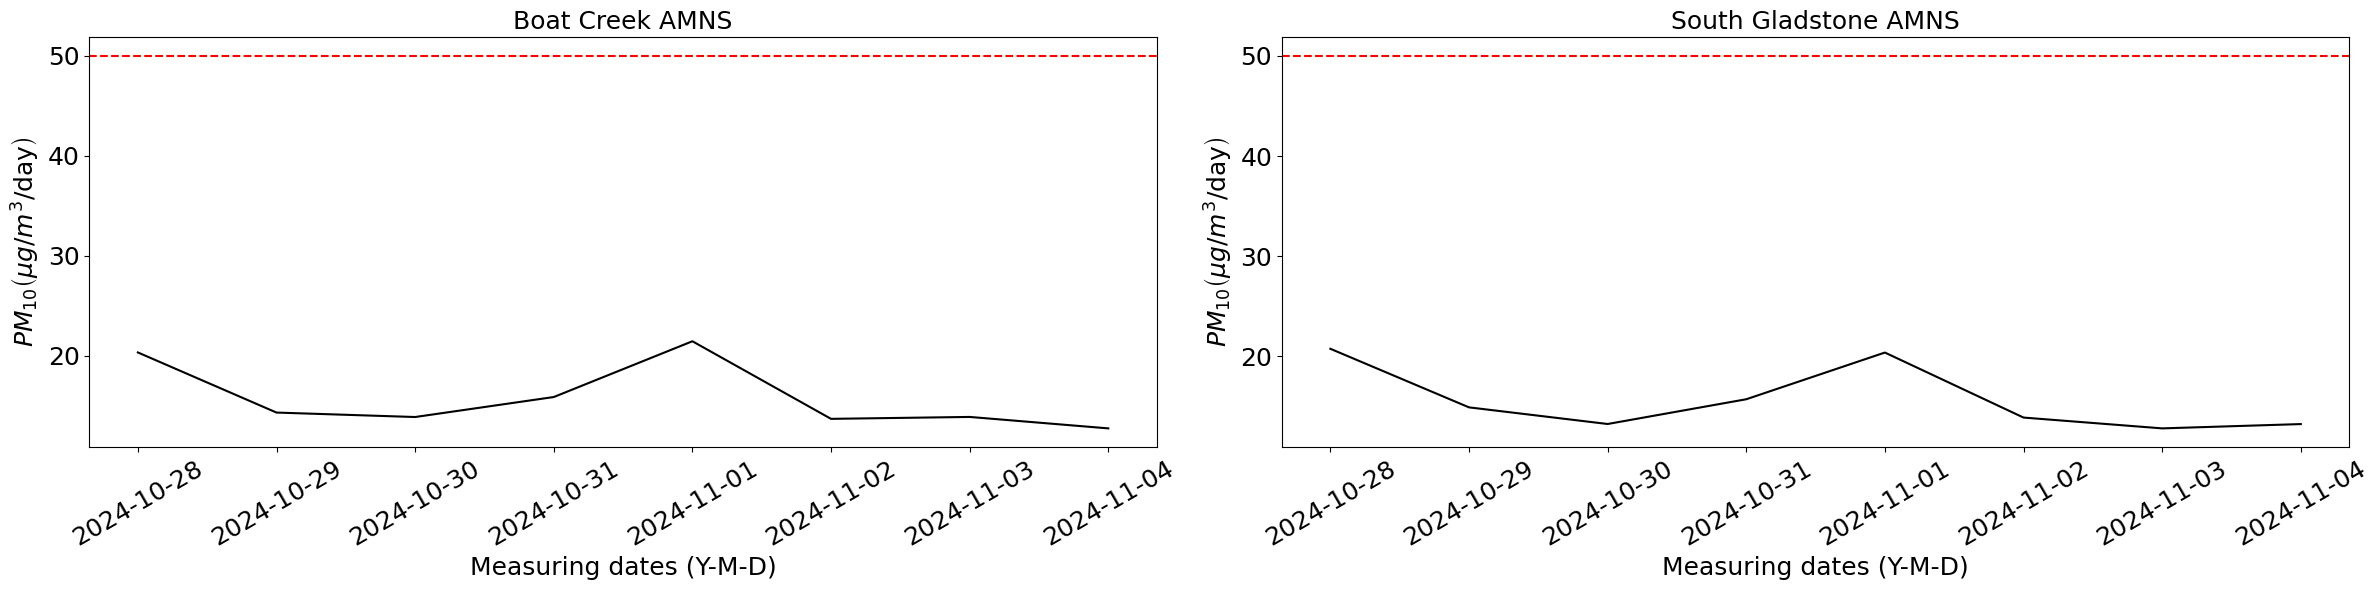

In [10]:
criterion = 50
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Boat Creek
df_24 = df_bc[df_bc.Parameter == 'Particle PM10'].groupby('date')['Measurement'].mean().reset_index()
y = df_24.Measurement
x = df_24.date
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$PM_{10} \left(\mu g/m^3/\text{day}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)
print(f'Boat Creek PM10 24hr max is {x.max()}')

# South Gladstone
df_24 = df_sg[df_sg.Parameter == 'Particle PM10'].groupby('date')['Measurement'].mean().reset_index()
y = df_24.Measurement
x = df_24.date
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$PM_{10} \left(\mu g/m^3/\text{day}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('South Gladstone AMNS', fontsize=TickSize)

# plot
plt.tight_layout()
plt.show()

> # 24 Hr PM2.5

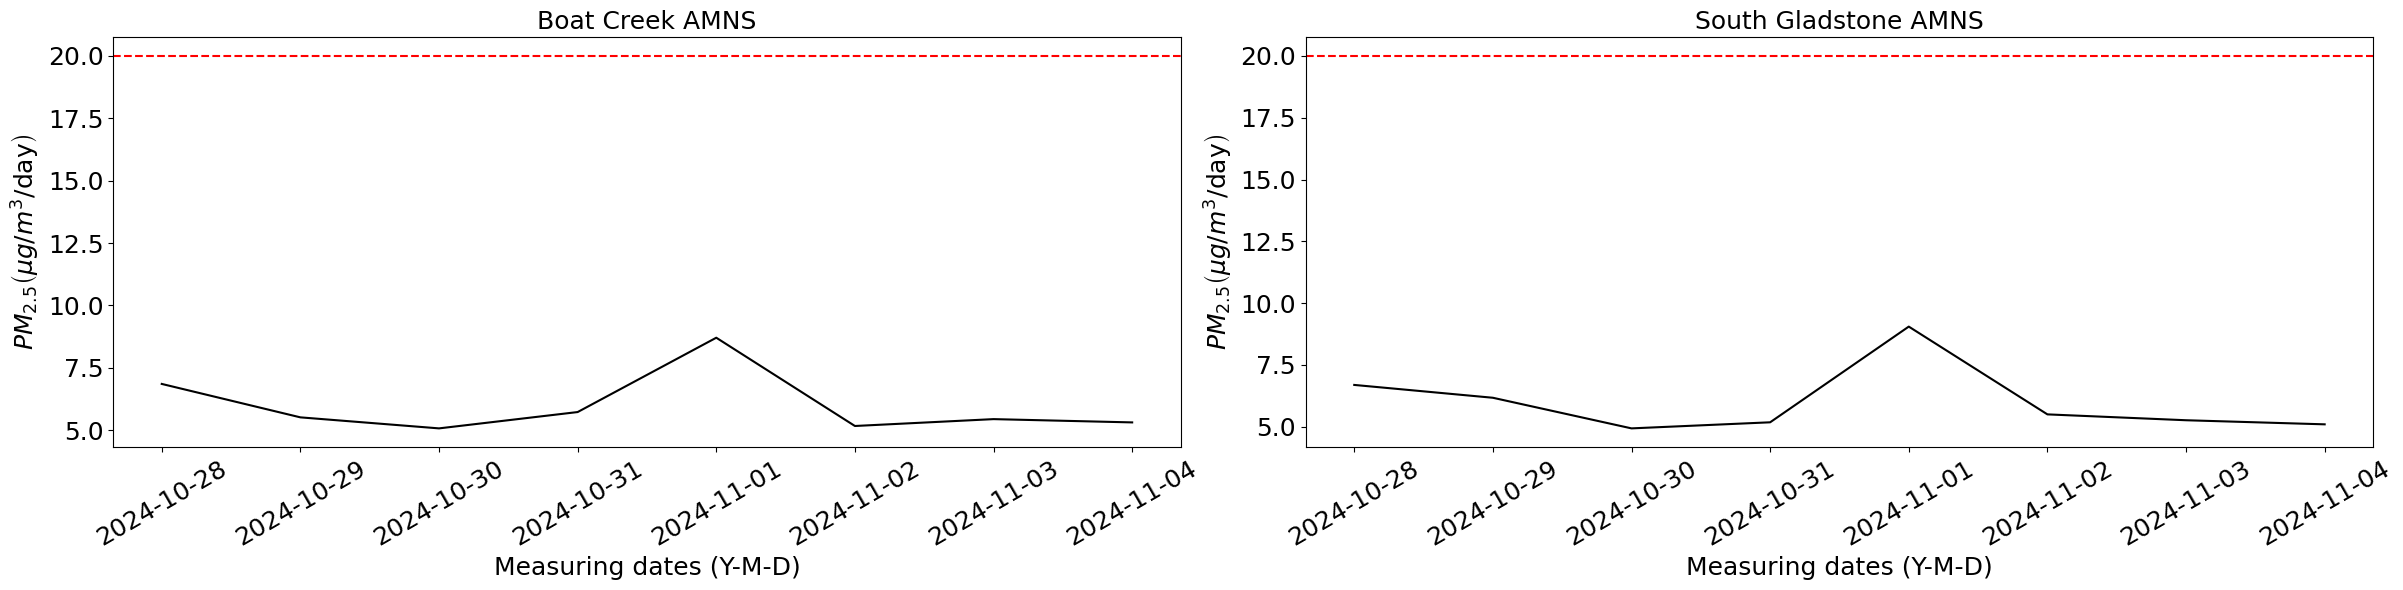

In [11]:
criterion = 20
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Boat Creek
df_24 = df_bc[df_bc.Parameter == 'Particle PM2.5'].groupby('date')['Measurement'].mean().reset_index()
y = df_24.Measurement
x = df_24.date
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$PM_{2.5} \left(\mu g/m^3/\text{day}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)

# South Gladstone
df_24 = df_sg[df_sg.Parameter == 'Particle PM2.5'].groupby('date')['Measurement'].mean().reset_index()
y = df_24.Measurement
x = df_24.date
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$PM_{2.5} \left(\mu g/m^3/\text{day}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('South Gladstone AMNS', fontsize=TickSize)


# plot
plt.tight_layout()
plt.show()

> # to plot the hourly rolling average

In [12]:
df_bc.head()

,Station,Datetime (UTC),Parameter,Measurement,Measurement units,Measurement running average,Measurement running average units,Validated,Time,year,month,day,hour,date
0,Boat Creek,2024-11-04T03:00:00.000Z,Nitrogen dioxide,0.00,µg/m³,0.000,ppm (1hr avg),N,2024-11-04 13:00:00+10:00,2024,11,4,13,2024-11-04
1,Boat Creek,2024-11-04T02:00:00.000Z,Nitrogen dioxide,0.00,µg/m³,0.000,ppm (1hr avg),N,2024-11-04 12:00:00+10:00,2024,11,4,12,2024-11-04
2,Boat Creek,2024-11-04T01:00:00.000Z,Nitrogen dioxide,0.00,µg/m³,0.000,ppm (1hr avg),N,2024-11-04 11:00:00+10:00,2024,11,4,11,2024-11-04
3,Boat Creek,2024-11-04T00:00:00.000Z,Nitrogen dioxide,5.64,µg/m³,0.003,ppm (1hr avg),N,2024-11-04 10:00:00+10:00,2024,11,4,10,2024-11-04
4,Boat Creek,2024-11-03T23:00:00.000Z,Nitrogen dioxide,3.76,µg/m³,0.002,ppm (1hr avg),N,2024-11-04 09:00:00+10:00,2024,11,4,9,2024-11-04


In [13]:
def rolling_avg_24hr(df):
    if len(df.Parameter.unique()) != 1:
        print('There should be only one item per calculation')
    else:
        df_roll = df.set_index('Time')
        df_roll.sort_index(inplace=True)
        df_roll.rename(columns={'Measurement':'rolling_24hr'}, inplace=True)
        rolling24 = df_roll.rolling_24hr.rolling(window='24H').mean()
        # merge the Series back to the dataframe
        df_roll = df.merge(rolling24, how='inner', on='Time')
        return df_roll

> ### PM10 rolling

In [14]:
bc_roll_24 = rolling_avg_24hr(df_bc[df_bc.Parameter == 'Particle PM10'])
sg_roll_24 = rolling_avg_24hr(df_sg[df_sg.Parameter == 'Particle PM10'])

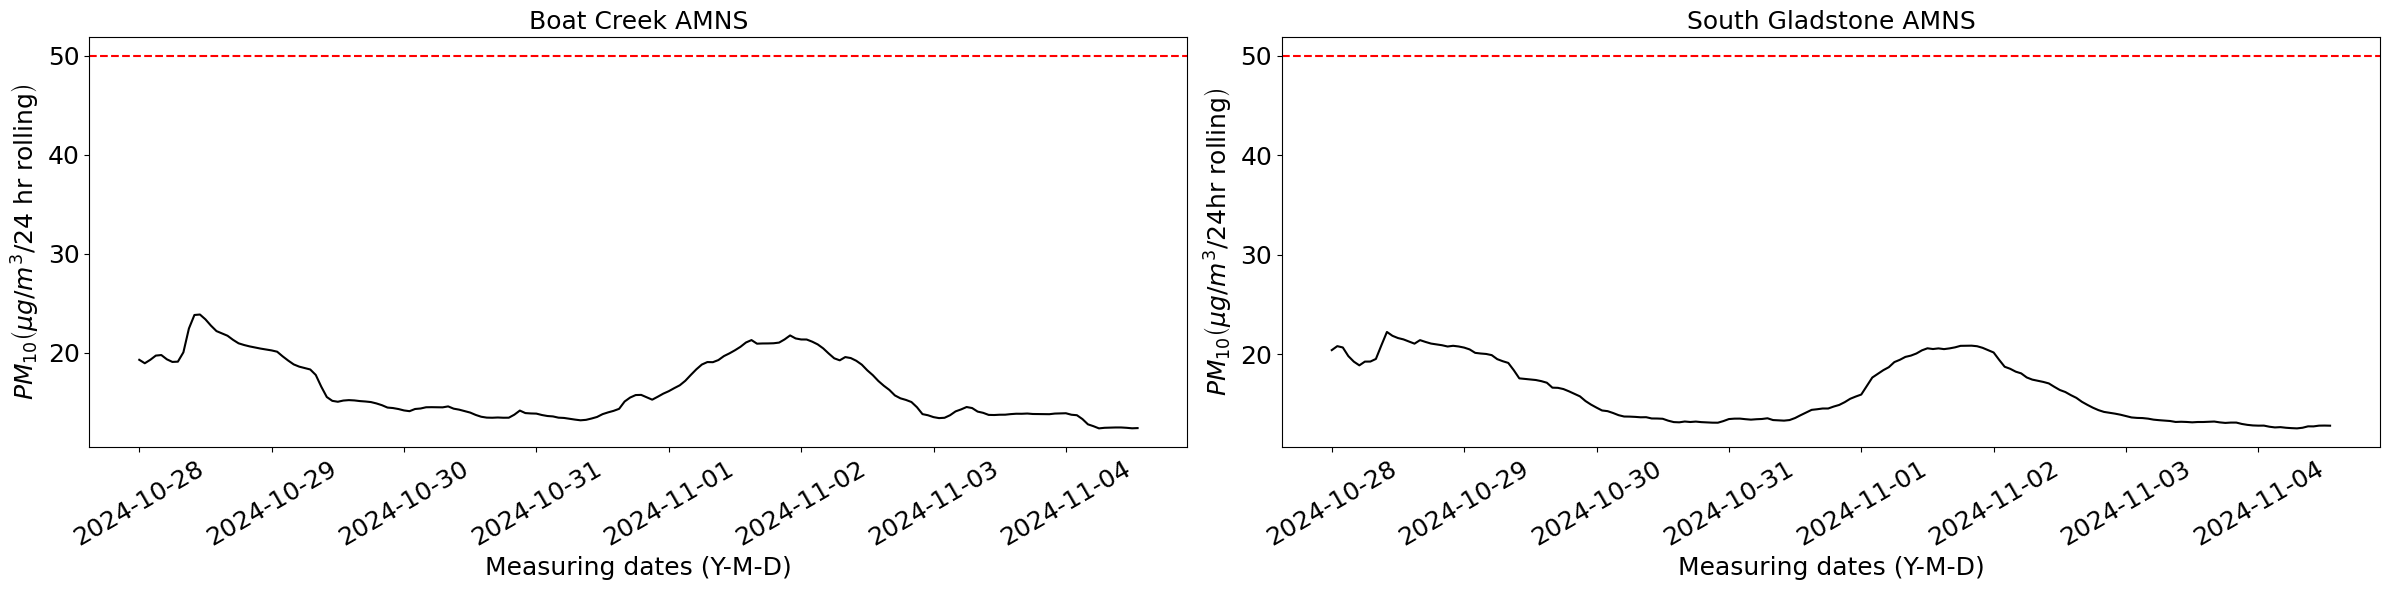

In [15]:
criterion = 50
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Boat Creek
df_24 = bc_roll_24
y = df_24.rolling_24hr
x = df_24.Time
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$PM_{10} \left(\mu g/m^3/\text{24 hr rolling}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)

# South Gladstone
df_24 = sg_roll_24
y = df_24.rolling_24hr
x = df_24.Time
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$PM_{10} \left(\mu g/m^3/\text{24hr rolling}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('South Gladstone AMNS', fontsize=TickSize)

# plot
plt.tight_layout()
plt.show()

> ### PM2.5 rolling

In [16]:
bc_roll_24 = rolling_avg_24hr(df_bc[df_bc.Parameter == 'Particle PM2.5'])
sg_roll_24 = rolling_avg_24hr(df_sg[df_sg.Parameter == 'Particle PM2.5'])

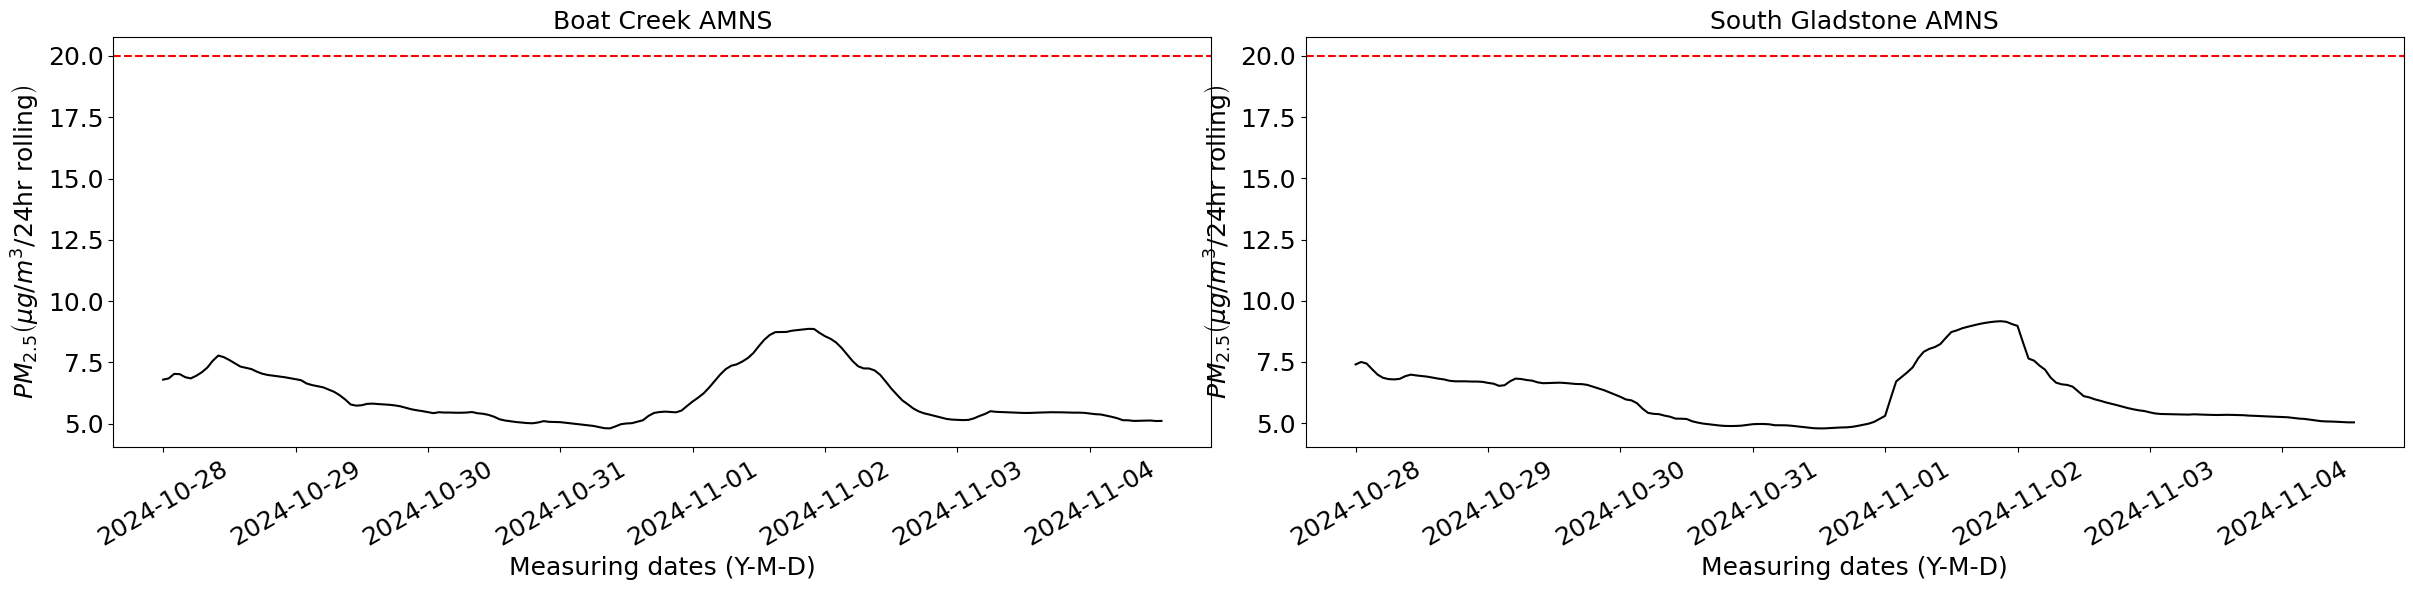

In [17]:
criterion = 20
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Boat Creek
df_24 = bc_roll_24
y = df_24.rolling_24hr
x = df_24.Time
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$PM_{2.5} \left(\mu g/m^3/\text{24hr rolling}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)

# South Gladstone
df_24 = sg_roll_24
y = df_24.rolling_24hr
x = df_24.Time
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$PM_{2.5} \left(\mu g/m^3/\text{24hr rolling}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('South Gladstone AMNS', fontsize=TickSize)


# plot
plt.tight_layout()
plt.show()

> ## now to check the yearly concentration level

> PM10

In [18]:
df_bc.head()

,Station,Datetime (UTC),Parameter,Measurement,Measurement units,Measurement running average,Measurement running average units,Validated,Time,year,month,day,hour,date
0,Boat Creek,2024-11-04T03:00:00.000Z,Nitrogen dioxide,0.00,µg/m³,0.000,ppm (1hr avg),N,2024-11-04 13:00:00+10:00,2024,11,4,13,2024-11-04
1,Boat Creek,2024-11-04T02:00:00.000Z,Nitrogen dioxide,0.00,µg/m³,0.000,ppm (1hr avg),N,2024-11-04 12:00:00+10:00,2024,11,4,12,2024-11-04
2,Boat Creek,2024-11-04T01:00:00.000Z,Nitrogen dioxide,0.00,µg/m³,0.000,ppm (1hr avg),N,2024-11-04 11:00:00+10:00,2024,11,4,11,2024-11-04
3,Boat Creek,2024-11-04T00:00:00.000Z,Nitrogen dioxide,5.64,µg/m³,0.003,ppm (1hr avg),N,2024-11-04 10:00:00+10:00,2024,11,4,10,2024-11-04
4,Boat Creek,2024-11-03T23:00:00.000Z,Nitrogen dioxide,3.76,µg/m³,0.002,ppm (1hr avg),N,2024-11-04 09:00:00+10:00,2024,11,4,9,2024-11-04


In [19]:
df_bc_year = df_bc.groupby(['year', 'Parameter'])['Measurement'].mean().reset_index()
df_mp_year = df_mp.groupby(['year', 'Parameter'])['Measurement'].mean().reset_index()
df_sg_year = df_sg.groupby(['year', 'Parameter'])['Measurement'].mean().reset_index()

In [20]:
df_bc_year

,year,Parameter,Measurement
0,2024,Nitrogen dioxide,6.865635
1,2024,Particle PM10,15.918232
2,2024,Particle PM2.5,6.008840
3,2024,Sulfur dioxide,0.000166
4,2024,Temperature,23.907143
5,2024,Visibility,15.110497
6,2024,Wind direction,163.802198
7,2024,Wind speed,1.900549


In [21]:
df_mp_year

,year,Parameter,Measurement
0,2024,Benzene,1.453846
1,2024,Formaldehyde,6.876923
2,2024,Nitrogen dioxide,9.121099
3,2024,Ozone,0.026132
4,2024,Sulfur dioxide,0.001038
5,2024,Toluene,3.322527
6,2024,Xylene,0.150000


In [22]:
df_sg_year

,year,Parameter,Measurement
0,2024,Humidity,71.261326
1,2024,Nitrogen dioxide,6.028603
2,2024,Particle PM10,15.743575
3,2024,Particle PM2.5,6.012291
4,2024,Rainfall,0.000000
5,2024,Solar radiation,312.243094
6,2024,Sulfur dioxide,0.000408
7,2024,Temperature,24.506630
8,2024,Visibility,13.307263
